In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import scipy.io as sio
from dataclasses import dataclass
from typing import List, Tuple
import os
from dotenv import load_dotenv
load_dotenv()
import tidy3d as td
from tidy3d import web
import numpy as np
from pathlib import Path
from stl import mesh
import matplotlib.pyplot as plt

In [2]:
import sys
import os

# Assuming /AutomationModule is in the root directory of your project
sys.path.append(os.path.abspath(fr'H:\phd stuff\tidy3d'))

from AutomationModule import * 

import AutomationModule as AM

In [3]:
tidy3dAPI = os.environ["API_TIDY3D_KEY"]


In [4]:
a = 3.4
lambdas = a/np.array([0.3,0.9]) 


ak4_1000_eps_9.0_eps.h5
Configured successfully.


<Figure size 1280x960 with 0 Axes>

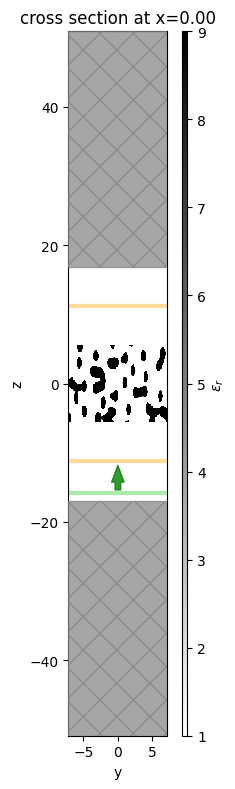

<Figure size 1600x1200 with 0 Axes>

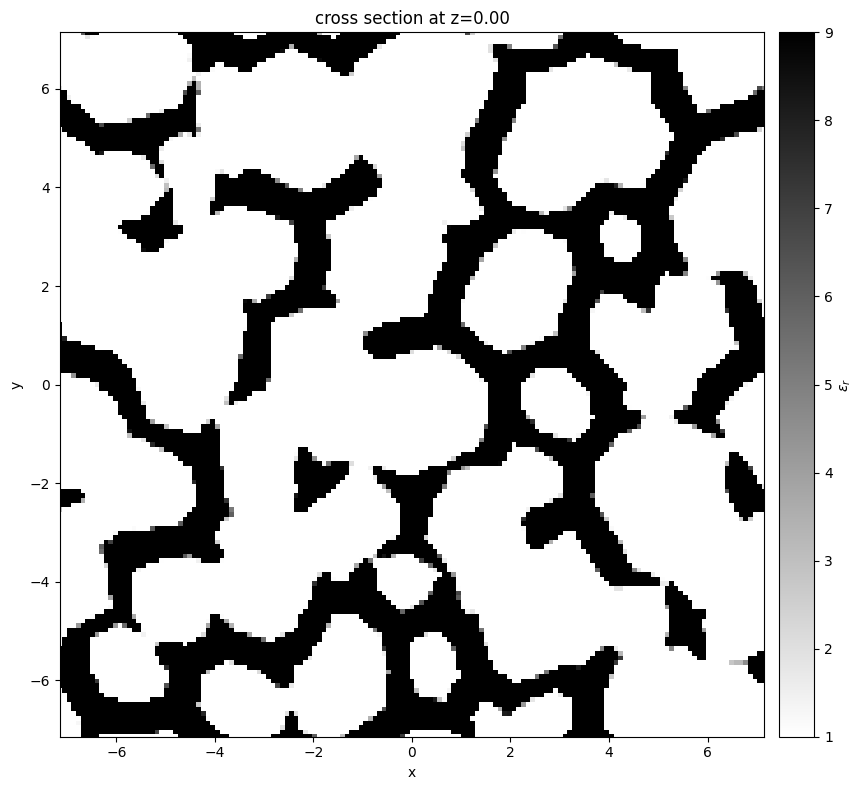

<Figure size 640x480 with 0 Axes>

14:27:35 W. Europe Standard Time Created task                                   
                                 'ak4_1000_eps_9.0_eps_eps_9.0_size_11.2_runtime
                                 _0_lambdaRange_11.3-3.78_incidence_z_0' with   
                                 task_id                                        
                                 'fdve-33a94670-3a40-4958-af18-0e676347fdb1' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=120946;https://tidy3d.simulation.cloud/workbench?taskId=fdve-33a94670-3a40-4958-af18-0e676347fdb1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=691520;https://tidy3d.simulation.cloud/workbench?taskId=fdve-33a94670-3a40-4958-af18-0e676347fdb1\task]8;;\
                                 ]8;id=691520;https://tidy3d.simulation.cloud/workbench?taskId=fdve-33a94670-3a40-4958-af18-0e676347fdb1\Id]8;;\]8;id=120946;https://tidy3d.simulation.cloud/workbench?taskId=fdve-33a94670-3a40-4958-af18-0e676347fdb1\=]8;;\]8;id=314062;https://tidy3d.simulation.cloud/workbench?taskId=fdve-33a94670-3a40-4958-af18-0e676347fdb1\fdve]8;;\]8;id=120946;https://tidy3d.simulation.cloud/workbench?taskId=fdve-33a94670-3a40-4958-af18-0e676347fdb1\-33a94670-3a40-4958-af18-0e676347fdb1']8;;\.

Output()

14:27:38 W. Europe Standard Time status = queued

                                 To cancel the simulation, use                  
                                 'web.abort(task_id)' or 'web.delete(task_id)'  
                                 or abort/delete the task in the web UI.        
                                 Terminating the Python script will not stop the
                                 job running on the cloud.

Output()

14:27:42 W. Europe Standard Time status = preprocess

14:27:43 W. Europe Standard Time Maximum FlexCredit cost: 0.025. Use            
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

                                 starting up solver

                                 running solver

Output()

Output()

14:27:55 W. Europe Standard Time status = postprocess

14:27:56 W. Europe Standard Time status = success

                                 View simulation result at                      
                                 ]8;id=753018;https://tidy3d.simulation.cloud/workbench?taskId=fdve-33a94670-3a40-4958-af18-0e676347fdb1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=592024;https://tidy3d.simulation.cloud/workbench?taskId=fdve-33a94670-3a40-4958-af18-0e676347fdb1\task]8;;\
                                 ]8;id=592024;https://tidy3d.simulation.cloud/workbench?taskId=fdve-33a94670-3a40-4958-af18-0e676347fdb1\Id]8;;\]8;id=753018;https://tidy3d.simulation.cloud/workbench?taskId=fdve-33a94670-3a40-4958-af18-0e676347fdb1\=]8;;\]8;id=26154;https://tidy3d.simulation.cloud/workbench?taskId=fdve-33a94670-3a40-4958-af18-0e676347fdb1\fdve]8;;\]8;id=753018;https://tidy3d.simulation.cloud/workbench?taskId=fdve-33a94670-3a40-4958-af18-0e676347fdb1\-33a94670-3a40-4958-af18-0e676347fdb1']8;;\.

                                 Created task                                   
                                 'ak4_1000_eps_9.0_eps_eps_9.0_size_11.2_runtime
                                 _0_lambdaRange_11.3-3.78_incidence_z' with     
                                 task_id                                        
                                 'fdve-f4f6d62e-b21f-4bb4-ad5d-ed222d4d0d94' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=965341;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f4f6d62e-b21f-4bb4-ad5d-ed222d4d0d94\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=465122;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f4f6d62e-b21f-4bb4-ad5d-ed222d4d0d94\task]8;;\
                                 ]8;id=465122;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f4f6d62e-b21f-4bb4-ad5d-ed222d4d0d94\Id]8;;\]8;id=965341;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f4f6d62e-b21f-4bb4-ad5d-ed222d4d0d94\=]8;;\]8;id=660624;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f4f6d62e-b21f-4bb4-ad5d-ed222d4d0d94\fdve]8;;\]8;id=965341;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f4f6d62e-b21f-4bb4-ad5d-ed222d4d0d94\-f4f6d62e-b21f-4bb4-ad5d-ed222d4d0d94']8;;\.

Output()

14:31:12 W. Europe Standard Time status = queued

                                 To cancel the simulation, use                  
                                 'web.abort(task_id)' or 'web.delete(task_id)'  
                                 or abort/delete the task in the web UI.        
                                 Terminating the Python script will not stop the
                                 job running on the cloud.

Output()

14:32:05 W. Europe Standard Time status = preprocess

14:32:30 W. Europe Standard Time Maximum FlexCredit cost: 0.555. Use            
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

                                 starting up solver

                                 running solver

Output()

14:34:01 W. Europe Standard Time status = postprocess

Output()

14:34:09 W. Europe Standard Time status = success

                                 View simulation result at                      
                                 ]8;id=211356;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f4f6d62e-b21f-4bb4-ad5d-ed222d4d0d94\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=164167;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f4f6d62e-b21f-4bb4-ad5d-ed222d4d0d94\task]8;;\
                                 ]8;id=164167;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f4f6d62e-b21f-4bb4-ad5d-ed222d4d0d94\Id]8;;\]8;id=211356;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f4f6d62e-b21f-4bb4-ad5d-ed222d4d0d94\=]8;;\]8;id=295311;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f4f6d62e-b21f-4bb4-ad5d-ed222d4d0d94\fdve]8;;\]8;id=211356;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f4f6d62e-b21f-4bb4-ad5d-ed222d4d0d94\-f4f6d62e-b21f-4bb4-ad5d-ed222d4d0d94']8;;\.

In [5]:
folder_path = rf"H:\phd stuff\tidy3d\structures\LSU H5"
project_name = "11_08_2024 Florescu LSU H5"
postprocess_results = []
runtime_ps = 30e-12
min_steps_per_lambda = 20
for direction in ["z"]: 
    for filename in os.listdir(folder_path):
        print(filename)
        if not (Path(filename).suffix==".h5" or Path(filename).suffix==".stl"):
            continue 
        if os.path.isfile(os.path.join(folder_path, filename)):
            file=os.path.join(folder_path, filename)
            structure_1 = AM.loadAndRunStructure(key = tidy3dAPI, file_path=file
                                            ,direction=direction, lambda_range=lambdas,
                                            box_size=14.3,runtime_ps=runtime_ps,min_steps_per_lambda=min_steps_per_lambda,
                                           scaling=1,shuoff_condtion=1e-20, verbose=True, 
                                           monitors=["flux"], freqs=250, 
                                           cut_condition=0.39, source="planewave", absorbers=120, use_permittivity=False,
                                           )
            
            structure_1.plot_sim_layout()
            structure_1.run_sim(run_free=False,load=False,add_ref=True,folder_description=project_name)